In [ ]:
!pip install gradio
!pip install keras!


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: 'keras!': Expected end or semicolon (after name and no valid version specifier)
    keras!
         ^


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import gradio as gr

# Clean Data

In [2]:
import pandas as pd

# Đọc tệp CSV
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
meta_df = pd.read_csv("Meta.csv")

# Kiểm tra thông tin tổng quan
print("Train Data:", train_df.shape)
print("Test Data:", test_df.shape)
print("Meta Data:", meta_df.shape)




Train Data: (39209, 8)
Test Data: (12630, 8)
Meta Data: (43, 5)


In [3]:
# Kiểm tra dữ liệu trống
print("Missing values in Train:\n", train_df.isnull().sum())
print("Missing values in Test:\n", test_df.isnull().sum())
print("Missing values in Meta:\n", meta_df.isnull().sum())

# Kiểm tra dữ liệu trùng lặp
print("Duplicates in Train:", train_df.duplicated().sum())
print("Duplicates in Test:", test_df.duplicated().sum())
print("Duplicates in Meta:", meta_df.duplicated().sum())


Missing values in Train:
 Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64
Missing values in Test:
 Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64
Missing values in Meta:
 Path       0
ClassId    0
ShapeId    0
ColorId    0
SignId     1
dtype: int64
Duplicates in Train: 0
Duplicates in Test: 0
Duplicates in Meta: 0


In [4]:
# Gán nhãn bằng cách nối với Meta.csv theo ClassId
train_labeled = train_df.merge(meta_df, on="ClassId", how="left")
test_labeled = test_df.merge(meta_df, on="ClassId", how="left")

# Kiểm tra dữ liệu sau khi gán nhãn
train_labeled.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path_x,Path_y,ShapeId,ColorId,SignId
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,Meta/20.png,0,0,1.1
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,Meta/20.png,0,0,1.1
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,Meta/20.png,0,0,1.1
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,Meta/20.png,0,0,1.1
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,Meta/20.png,0,0,1.1


# Model

In [5]:
data = []
labels = []
classes = 43 # số lớp trong data
cur_path = os.getcwd() # lấy đường dẫn vào file

for i in range(classes):
    path = os.path.join("D:\TaiLieuHoc\Kỳ 4\AIL303m\Project nhóm 5\GTSRB",'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30,30)) # resize lại ảnh
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            # Converting lists into numpy arrays
            
data = np.array(data)
labels = np.array(labels)


In [6]:

# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("Project.keras")

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.3157 - loss: 3.2470 - val_accuracy: 0.8618 - val_loss: 0.6279
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7191 - loss: 0.9553 - val_accuracy: 0.9184 - val_loss: 0.2919
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8142 - loss: 0.6122 - val_accuracy: 0.9404 - val_loss: 0.2144
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8642 - loss: 0.4551 - val_accuracy: 0.9643 - val_loss: 0.1221
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8895 - loss: 0.3672 - val_accuracy: 0.9690 - val_loss: 0.1082
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9062 - loss: 0.3174 - val_accuracy: 0.9621 - val_loss: 0.1283
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9053 - loss: 0.3161 - val_accuracy: 0.9740 - val_loss: 0.0852
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9158 - loss: 0.2901 - 

In [9]:
print(f"📊 X_train shape: {X_train.shape}")
print(f"📊 y_train shape: {y_train.shape}")
print(f"📊 X_test shape: {X_test.shape}")
print(f"📊 y_test shape: {y_test.shape}")


📊 X_train shape: (31367, 30, 30, 3)
📊 y_train shape: (31367, 43)
📊 X_test shape: (7842, 30, 30, 3)
📊 y_test shape: (7842, 43)


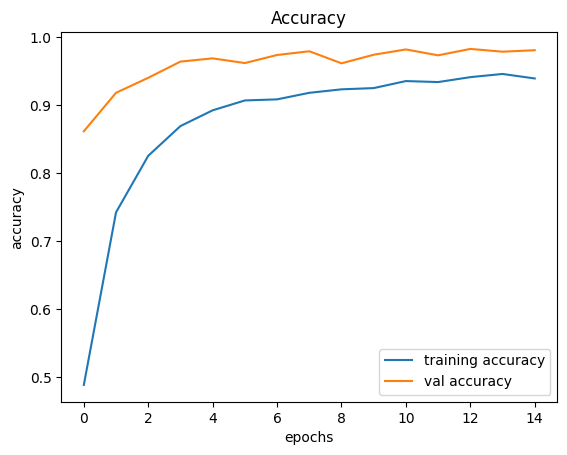

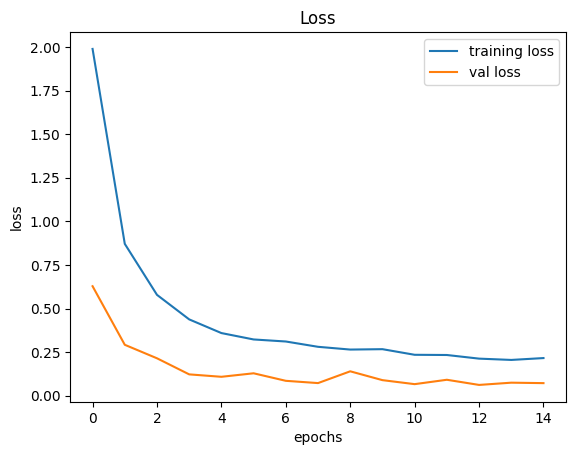

In [10]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv("D:\TaiLieuHoc\Kỳ 4\AIL303m\Project nhóm 5\GTSRB\Test.csv") # Đọc file 
print(y_test.head())  # In 5 dòng đầu để kiểm tra nội dung


labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    folder_path = "D:\TaiLieuHoc\Kỳ 4\AIL303m\Project nhóm 5\GTSRB"
    img_path = os.path.join(folder_path, img.replace("/", "\\"))  # Chuyển '/' thành '\'  # Ghép đường dẫn
    if os.path.exists(img_path):  # Kiểm tra file có tồn tại không
        image = Image.open(img_path)
        image = image.resize((30,30))
        data.append(np.array(image))
    else:
        print(f"File không tồn tại: {img_path}")  # Cảnh báo nếu file bị thiếu

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred)) # In ra tỉ lệ chính xác của model

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
0.945526524148852


In [13]:
# Saving the Model
model.save("Project.keras")